# Intrahost diversity 

**Date**: 2020-02-15    
**Author**: Katarina Braun 

## Overview
- The purpose of this script is to take raw diveristy (π) data, generated from the SNPGenie program, and generate plots to visualize and compare genewise πS (synonymous diveristy) and πN(nonsynonymous diversity). 

- will plot π, pulled from `population_summary.txt` files -- fifth column 
- plot each gene within each ferret first 


## Input: 

- `diversity/swab.txt`
- `diversity/vero76.txt`
- `diversity/veroE6.txt`
- `diversity/veroSTAT1KO.txt`

## Output:  

- Figure is saved to `diversity/π.pdf`

### import modules and dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns; sns.set()
from matplotlib import pyplot
import matplotlib.pyplot as plt
from functools import reduce
import matplotlib as mpl
from matplotlib import gridspec
import itertools
import pysam
import matplotlib.patches as mpatches
import random 
from pylab import *
from matplotlib.font_manager import FontProperties 
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from matplotlib import gridspec
from matplotlib.colors import ListedColormap

In [4]:
# load SNPGenie π output files 

reorderlist = ['ORF1a', 'ORF1b', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10']

swab = pd.read_csv(filepath_or_buffer='swab.txt', header=0, sep='\t', low_memory=False)
swab = swab.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
swab = swab.iloc[:-33]
swab = swab.set_index('product')
swab = swab.reindex(reorderlist)

vero76 = pd.read_csv(filepath_or_buffer='vero76.txt', header=0, sep='\t', low_memory=False)
vero76 = vero76.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
vero76 = vero76.iloc[:-33]
vero76 = vero76.set_index('product')
vero76 = vero76.reindex(reorderlist)

veroE6 = pd.read_csv(filepath_or_buffer='veroE6.txt', header=0, sep='\t', low_memory=False)
veroE6 = veroE6.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
# veroE6 = veroE6.iloc[:-33]
veroE6 = veroE6.set_index('product')
veroE6 = veroE6.reindex(reorderlist)

veroSTAT1KO = pd.read_csv(filepath_or_buffer='veroSTAT1KO.txt', header=0, sep='\t', low_memory=False)
veroSTAT1KO = veroSTAT1KO.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
# veroSTAT1KO = veroSTAT1KO.iloc[:-33]
veroSTAT1KO = veroSTAT1KO.set_index('product')
veroSTAT1KO = veroSTAT1KO.reindex(reorderlist)

##

### generate the plots

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


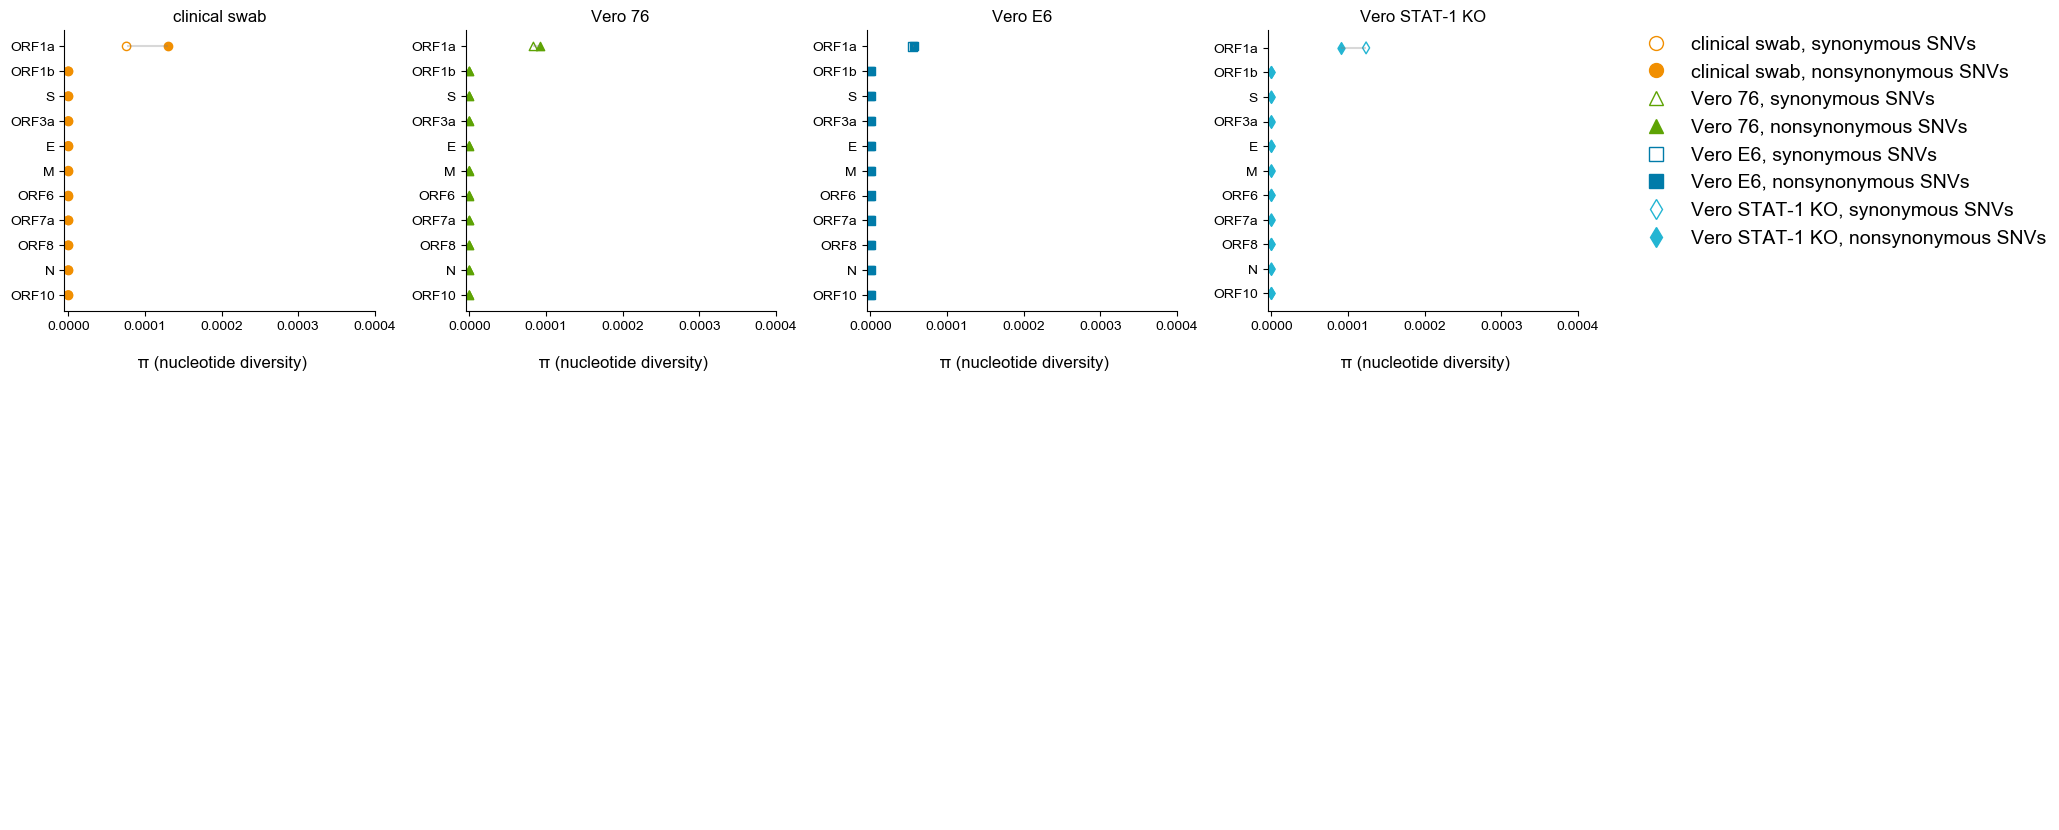

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'

# generate a figure with sub-plots 
fig1 = plt.figure(figsize=(24,14), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4,18)

ax1 = fig1.add_subplot(gs[0, 0:3]) # swab
ax2 = fig1.add_subplot(gs[0, 3:6]) # vero76
ax3 = fig1.add_subplot(gs[0, 6:9]) # veroE6
ax4 = fig1.add_subplot(gs[0, 9:12]) # veroSTAT1KO


# get right of top and right frame of each subplot
axes = (ax1, ax2, ax3, ax4)
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

# Make the plot
# swab = '#F18F01'
ax1.set_title('clinical swab', fontname='Arial', fontsize=12)
my_range1=range(1,len(swab.index)+1)
ax1.invert_yaxis()
ax1.hlines(y=my_range1, xmin=swab['piN'], xmax=swab['piS'], color='grey', alpha=0.3)
ax1.scatter(swab['piN'], my_range1, color='#F18F01', marker='o', label='value1')
ax1.scatter(swab['piS'], my_range1, color='#F18F01', facecolors='none', marker='o', label='value2')
ax1.set_yticks([1,2,3,4,5,6,7,8,9,10,11])
ax1.set_xlim([-0.000005, 0.0004])
ax1.set_xticks([0, 0.0001, 0.0002, 0.0003, 0.0004])
ax1.set_xlabel('\n π (nucleotide diversity)', fontname='Arial', fontsize=12)
ax1.set_yticklabels(['ORF1a', 'ORF1b', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10'])

# Make the plot
# vero_76 = '#5EA304'
ax2.set_title('Vero 76', fontname='Arial', fontsize=12)
my_range2=range(1,len(vero76.index)+1)
ax2.invert_yaxis()
ax2.hlines(y=my_range2, xmin=vero76['piN'], xmax=vero76['piS'], color='grey', alpha=0.3)
ax2.scatter(vero76['piN'], my_range2, color='#5EA304', marker='^', label='value1')
ax2.scatter(vero76['piS'], my_range2, color='#5EA304', marker='^', facecolors='none', label='value2')
ax2.set_yticks([1,2,3,4,5,6,7,8,9,10,11])
ax2.set_xlim([-0.000005, 0.0004])
ax2.set_xticks([0, 0.0001, 0.0002, 0.0003, 0.0004])
ax2.set_xlabel('\n π (nucleotide diversity)', fontname='Arial', fontsize=12)
ax2.set_yticklabels(['ORF1a', 'ORF1b', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10'])

# Make the plot
# vero_E6 = '#007BA9'
ax3.set_title('Vero E6', fontname='Arial', fontsize=12)
my_range3=range(1,len(veroE6.index)+1)
ax3.invert_yaxis()
ax3.hlines(y=my_range3, xmin=veroE6['piN'], xmax=veroE6['piS'], color='grey', alpha=0.3)
ax3.scatter(veroE6['piN'], my_range3, color='#007BA9', marker='s', label='value1')
ax3.scatter(veroE6['piS'], my_range3, color='#007BA9', marker='s', facecolors='none', label='value2')
ax3.set_yticks([1,2,3,4,5,6,7,8,9,10,11])
ax3.set_xlim([-0.000005, 0.0004])
ax3.set_xticks([0, 0.0001, 0.0002, 0.0003, 0.0004])
ax3.set_xlabel('\n π (nucleotide diversity)', fontname='Arial', fontsize=12)
ax3.set_yticklabels(['ORF1a', 'ORF1b', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10'])

# Make the plot
ax4.set_title('Vero STAT-1 KO', fontname='Arial', fontsize=12)
# vero_STAT1KO = '#23B5D3'
my_range4=range(1,len(veroSTAT1KO.index)+1)
ax4.invert_yaxis()
ax4.hlines(y=my_range4, xmin=veroSTAT1KO['piN'], xmax=veroSTAT1KO['piS'], color='grey', alpha=0.3)
ax4.scatter(veroSTAT1KO['piN'], my_range4, color='#23B5D3', marker='d', label='value1')
ax4.scatter(veroSTAT1KO['piS'], my_range4, color='#23B5D3', marker='d', facecolors='none', label='value2')
ax4.set_yticks([1,2,3,4,5,6,7,8,9,10,11])
ax4.set_xlim([-0.000005, 0.0004])
ax4.set_xticks([0, 0.0001, 0.0002, 0.0003, 0.0004])
ax4.set_xlabel('\n π (nucleotide diversity)', fontname='Arial', fontsize=12)
ax4.set_yticklabels(['ORF1a', 'ORF1b', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10'])

# add a legend to this plot

swab_C = '#F18F01'
vero_76 = '#5EA304'
vero_E6 = '#007BA9'
vero_STAT1KO = '#23B5D3'

swab_syn = mlines.Line2D([], [], marker='o', markerfacecolor='None', markeredgecolor=swab_C, linestyle='None', markersize=10, label='clinical swab, synonymous SNVs')
swab_nonsyn = mlines.Line2D([], [], marker='o', markerfacecolor=swab_C, markeredgecolor=swab_C, linestyle='None', markersize=10, label='clinical swab, nonsynonymous SNVs')
vero76_syn = mlines.Line2D([], [], marker='^', markerfacecolor='None', markeredgecolor=vero_76, linestyle='None', markersize=10, label='Vero 76, synonymous SNVs')
vero76_nonsyn = mlines.Line2D([], [], marker='^', markerfacecolor=vero_76, markeredgecolor=vero_76, linestyle='None', markersize=10, label='Vero 76, nonsynonymous SNVs')
veroE6_syn = mlines.Line2D([], [], marker='s', markerfacecolor='None', markeredgecolor=vero_E6, linestyle='None', markersize=10, label='Vero E6, synonymous SNVs')
veroE6_nonsyn = mlines.Line2D([], [], marker='s', markerfacecolor=vero_E6, markeredgecolor=vero_E6, linestyle='None', markersize=10, label='Vero E6, nonsynonymous SNVs')
veroSTAT1KO_syn = mlines.Line2D([], [], marker='d', markerfacecolor='None', markeredgecolor=vero_STAT1KO, linestyle='None', markersize=10, label='Vero STAT-1 KO, synonymous SNVs')
veroSTAT1KO_nonsyn = mlines.Line2D([], [], marker='d', markerfacecolor=vero_STAT1KO, markeredgecolor=vero_STAT1KO, linestyle='None', markersize=10, label='Vero STAT-1 KO, nonsynonymous SNVs')

fig1.legend(handles=[swab_syn, swab_nonsyn, vero76_syn, vero76_nonsyn, veroE6_syn, veroE6_nonsyn, veroSTAT1KO_syn, veroSTAT1KO_nonsyn], frameon=False, fontsize=14, bbox_to_anchor=(0.86,0.58))

# use tight_layout to optimize spacing of axes and titles within each subplot
fig1.tight_layout()
fig1.show()

# save this plot to the figures folder 
fig1.savefig("π.pdf", bbox_inches='tight', dpi=300)

#